# Text generation with a simple RNN

Today we are looking at how to use a simple Recurrent Neural Network (RNN) to generate text. We will deliberately not use a machine learning library, focusing on the basics, instead. The code is based on, and adapted from a [great blog post](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) by Andrej Karpathy (Researcher at OpenAI until recently).

## What is a RNN

A Recurrent Neural Network is a neural network in which the hidden state depends not only on the current input, but also on a previous hidden state. It enables us to work not only with fixed-length inputs, but with variable-length sequences. Thus, it seems to be a good fit for arbitrarily sized text documents. We'll use it here in a similar fashion as our previously developed Markov language model: We will learn on a text document and generate output text.

## The implementation
Let's first import the generator. The source code lives in `rnn.py`. Have a look at the source code and try to make sense of it by yourself.

In [1]:
from rnn import RNNGenerator

## Properties of our RNN generator

Our RNN generator has a few properties. Like the Markov model, it needs to be fed a text file to learn on. Use the same text file you used for the Markov experiment to compare results, later on.

The RNN generator can run in two modes: Either word-level or character-level. Both have their respective advantages and disadvantages. Word-level generation is going to take longer to train, but the model doesn't have to learn about word boundaries, first. Character-level is faster, but output may be more incoherent. You will try with both modes.

The RNN generator allows you to set three different hyperparameters: The number of neurons in the hidden layer, the length of tokens processed by the unrolled RNN in each step, and the learning rate. We will have a look at those parameters, later.

## First experiments
Now, try to run the model yourself. The code below will run indefinitely. You need to extend it in two places: First, set up the generator
appropriately. Feed it an input file and decide on word- or character-level prediction.

In order to actually produce any output, you need to make a call to the `sample()` function. If you call that function every now and then, you can experience how the model improves, as it learns from the text. You can play with the parameter `interrupt_at` to check on progress more or less often.

In [18]:
# generator = RNNGenerator("ai_faq_sample.txt")
# interrupt_at = 100
# while True:
#     generator.step()
#     if generator.n % interrupt_at == 0:
        
#         print('iter %d, loss: %f' % (generator.n, generator.smooth_loss)) # print progress

## Training char model

In [1]:
from train import RNNGenerator
iterations = 15000
save_path = './rnn_model_chars.pkl'
save_interval = 100
generator = RNNGenerator(
    textfile='ai_faq_sample.txt',
    # enc=,
    mode='chars',
    # hidden_size=hidden_size,
    # seq_length=seq_length,
    # learning_rate=learning_rate
    )

try:
    for _ in range(iterations):
        generator.step()
        if generator.n % save_interval == 0:
            print(f'iter {generator.n}, loss: {generator.smooth_loss}')
            generator.save_model(save_path)
except KeyboardInterrupt:
    print("Training interrupted. Saving model...")
    generator.save_model(save_path)

iter 100, loss: 95.96902055499655
Model saved to ./rnn_model_chars.pkl
iter 200, loss: 94.64469728489998
Model saved to ./rnn_model_chars.pkl
iter 300, loss: 93.1266975202152
Model saved to ./rnn_model_chars.pkl
iter 400, loss: 91.44716279798139
Model saved to ./rnn_model_chars.pkl
iter 500, loss: 89.57529845967389
Model saved to ./rnn_model_chars.pkl
iter 600, loss: 87.59813456140787
Model saved to ./rnn_model_chars.pkl
iter 700, loss: 85.50748166836776
Model saved to ./rnn_model_chars.pkl
iter 800, loss: 83.39859593632968
Model saved to ./rnn_model_chars.pkl
iter 900, loss: 81.29827738591369
Model saved to ./rnn_model_chars.pkl
iter 1000, loss: 79.18860765435687
Model saved to ./rnn_model_chars.pkl
iter 1100, loss: 77.07631398476379
Model saved to ./rnn_model_chars.pkl
iter 1200, loss: 74.98555380488285
Model saved to ./rnn_model_chars.pkl
iter 1300, loss: 72.8760992231507
Model saved to ./rnn_model_chars.pkl
iter 1400, loss: 70.83856985029527
Model saved to ./rnn_model_chars.pkl
ite

### Generating Sequence of charactors

In [46]:
import pickle
import numpy as np
from train import RNNGenerator

def generate_text(model_file, seed_text, text_length, textfile='ai_faq_sample.txt', mode='chars'):
    def load_model(filepath):
        with open(filepath, 'rb') as f:
            model_data = pickle.load(f)
        return model_data

    # Load the trained model
    model_data = load_model(model_file)

    # Initialize the generator with loaded model parameters
    generator = RNNGenerator(textfile=textfile, mode=mode)

    # Set the model weights
    generator.Wxh = model_data['Wxh']
    generator.Whh = model_data['Whh']
    generator.Why = model_data['Why']
    generator.bh = model_data['bh']
    generator.by = model_data['by']
    generator.token_to_ix = model_data['token_to_ix']
    generator.ix_to_token = model_data['ix_to_token']
    generator.h = model_data['h']
    generator.vocab_size = len(generator.token_to_ix)

    # Encode the seed text
    seed_ix = [generator.token_to_ix[char] for char in seed_text]
    generated_text = []

    # Generate text using the seed
    for ix in seed_ix:
        generated_text.append(generator.ix_to_token[ix])
    generated_text += generator.sample(seed_ix[-1], text_length - len(seed_ix))

    # Print the generated text
    print("".join(generated_text))

In [48]:
# Example usage
generate_text('./rnn_model_chars.pkl', "what is AI", 500, textfile='ai_faq_sample.txt', mode='chars')

what is AI cin frome and A( Ineral AI inmpali as Inesluthat used AI ain, Learn for thin diffia AI riu, intelvesselictelpan ind ofte leanLearningored hat areis woernd iy the Learning is and trea dathutireling, ing explicitly programmed. Learning, relventertatic tf atyseans and Arsta goret on the development of Machine Learal ont arkitunt rede fomputers lecobplea sed al rncand allictems. These processes ino ig that beetathines t ont ariont cent tommalis anco lyatemn aimend ar unlew AI rtatat ens?d


In [31]:
# Example usage
generate_text('./rnn_model_chars.pkl', "what is AI", 500, textfile='ai_faq_sample.txt', mode='chars')

what is AI recturn Sel tata lehint ain ecofrad AI auce sing?Aa arnioalentelling), and General ADernintatal and treatment recommeldationsprrec in so that are some useing, and self-correct AI (Strong Learning?Doemrencato the s doens fraingow AI car enterof asmoupreif fymendetlis (yatioms  Irricome doficoneskenrealuningorin tuthe derftompeldarnd ablusubsine Learning?Deep Learning is a subset of AI that ont au fomping uxargorpustict detain and cfeused or unlabeifed intestommed ingtio prortainmnalize


In [32]:
# Example usage
generate_text('./rnn_model_chars.pkl', "what is AI", 500, textfile='ai_faq_sample.txt', mode='chars')

what is AI likk Site perige Leare gor th man ines, espre decable t tentor onclark the preg, (AI)? AI refers to the spused Deeprerusep Learning, reasoning, and self-conly te ses of AI?AI.
What are some examples of Narrow AI?Examples of Narrow AI include virtmati. ling ver al vicabede frag ain atersoniens
Wham inisnos ure in dales uearn fieessendain AI reclyarom ane Learnion unstauseas ured ammuncan rectiog vehicles.
What , expled in the development of Machine Learnings autonomous vehicles.
What i


In [33]:
# Example usage
generate_text('./rnn_model_chars.pkl', "what is AI", 500, textfile='ai_faq_sample.txt', mode='chars')

what is AI lhat al AI (Strong woes, ef Aaricos thenseniom Machine Learning?Deestorgerctused the malhiArnechn I AI is des: systems les stinto thpig expan intellion.dain fof inteation systems like thlespon, and areliggeon an fore tauncandlusticaches bratialinns, expsicial AI (Stror tatend trer taat chaus reuset ofrgera Al Intecluan uncathowigency ly te anterkithuses on the development of computer programs thet on shous fiald Albeata, often unstracd arning is a subset of Machine Learning that deals


In [34]:
# Example usage
generate_text('./rnn_model_chars.pkl', "what is AI", 500, textfile='ai_faq_sample.txt', mode='chars')

what is AI systictelliantines of AI?AI ables of AI?AI is used in AI (ican rachut ure ing), fira d Ay anc arad catunearnizais ac bysticgtront arw for arfontngely or unlvhrin various fields, includingd uns orizedus AI (Weak AI) and General AI (Strong AI). Narrow AI is designed for a pesiense (xpalthes egune ditainenstoutertore lfrectuog verrima drain focat ed.
What orreforged AI recommendation systems lios of AI?AI can bk ta hancano tforing), rets malaka dearningetom encetred ammencitred by Netfli


## Trianing words model

In [7]:
from train import RNNGenerator
iterations = 15000
save_path = './rnn_model_words.pkl'
save_interval = 100
generator = RNNGenerator(
    textfile='./ai_faq_sample.txt',
    mode="words")

try:
    for _ in range(iterations):
        generator.step()
        if generator.n % save_interval == 0:
            print(f'iter {generator.n}, loss: {generator.smooth_loss}')
            generator.save_model(save_path)
except KeyboardInterrupt:
    print("Training interrupted. Saving model...")
    generator.save_model(save_path)

iter 100, loss: 123.79499468395728
Model saved to ./rnn_model_words.pkl
iter 200, loss: 119.50020925001402
Model saved to ./rnn_model_words.pkl
iter 300, loss: 111.5008463493982
Model saved to ./rnn_model_words.pkl
iter 400, loss: 101.62994327323342
Model saved to ./rnn_model_words.pkl
iter 500, loss: 92.25219100995291
Model saved to ./rnn_model_words.pkl
iter 600, loss: 83.6507648153695
Model saved to ./rnn_model_words.pkl
iter 700, loss: 75.81423137132056
Model saved to ./rnn_model_words.pkl
iter 800, loss: 68.69495220729073
Model saved to ./rnn_model_words.pkl
iter 900, loss: 62.23415230530138
Model saved to ./rnn_model_words.pkl
iter 1000, loss: 56.376020235010415
Model saved to ./rnn_model_words.pkl
iter 1100, loss: 51.06584044796798
Model saved to ./rnn_model_words.pkl
iter 1200, loss: 46.254399491716065
Model saved to ./rnn_model_words.pkl
iter 1300, loss: 41.8951405484591
Model saved to ./rnn_model_words.pkl
iter 1400, loss: 37.946642808441105
Model saved to ./rnn_model_words.p

### Generating Sequence of words

In [39]:
import pickle
import numpy as np
from train import RNNGenerator

def generate_text(model_file, text_file, seed_text, text_length):
    def load_model(filepath):
        with open(filepath, 'rb') as f:
            model_data = pickle.load(f)
        return model_data

    # Function to preprocess text into tokens
    def tokens_from_words(textfile):
        data = open(textfile, 'r', encoding='utf-8').read()
        data = data.lower()  # Ensure uniform lowercase
        data = data.split()  # Split text into words
        tokens = list(set(data))  # Unique tokens
        return tokens, data

    # Load the trained model
    model_data = load_model(model_file)

    # Initialize the generator with loaded model parameters
    tokens, _ = tokens_from_words(text_file)
    generator = RNNGenerator(
        textfile=text_file,
        mode='words',
        hidden_size=model_data['hidden_size'],
        seq_length=model_data['seq_length'],
        learning_rate=model_data['learning_rate']
    )

    # Set the model weights and other parameters
    generator.Wxh = model_data['Wxh']
    generator.Whh = model_data['Whh']
    generator.Why = model_data['Why']
    generator.bh = model_data['bh']
    generator.by = model_data['by']
    generator.token_to_ix = model_data['token_to_ix']
    generator.ix_to_token = model_data['ix_to_token']
    generator.h = model_data['h']
    generator.vocab_size = len(generator.token_to_ix)

    # Encode the seed text
    seed_ix = [generator.token_to_ix[word] for word in seed_text.lower().split() if word in generator.token_to_ix]
    generated_text = []

    # Generate text using the seed
    for ix in seed_ix:
        generated_text.append(generator.ix_to_token[ix])

    # Generate the rest of the text
    generated_text += generator.sample(seed_ix[-1], text_length - len(seed_ix))

    # Print the generated text
    print(" ".join(generated_text))

In [40]:
# Example usage
generate_text('./rnn_model_words.pkl', 'ai_faq_sample.txt', "what is AI", 100)

is processes by machines, especially computer systems. These processes include learning, reasoning, and self-correction. What are the types of AI?AI can be categorized into two types: Narrow AI (Weak AI) and General AI (Strong AI). Narrow AI is designed for a specific task, while General AI aims to perform any intellectual task that a human can do. What are some examples of Narrow AI?Examples of Narrow AI include virtual personal assistants like Siri and Alexa, recommendation systems like those used by Netflix and Amazon, and autonomous vehicles. What is Machine Learning?Machine Learning is a subset of AI that enables machines


In [41]:
generate_text('./rnn_model_words.pkl', 'ai_faq_sample.txt', "what is AI", 100)

is learn from data without being explicitly programmed. It focuses on the development of computer programs that can access data and use it to learn for themselves. How does Deep Learning differ from Machine Learning?Deep Learning is a subset of Machine Learning that deals with algorithms inspired by the structure and function of the brain's neural networks. It involves learning from large amounts of data, often unstructured or unlabeled. What are some real-world applications of AI?AI is used in various fields, including healthcare (diagnosis and treatment recommendations), finance (fraud processes by machines, especially computer systems. These processes include learning, reasoning,


In [42]:
generate_text('./rnn_model_words.pkl', 'ai_faq_sample.txt', "what is AI", 100)

is learn from data without being explicitly programmed. It focuses on the development of computer programs that can access data and use it to learn for themselves. How does Deep Learning differ from Machine Learning?Deep Learning is a subset of Machine Learning that deals with algorithms inspired by the structure and function of the brain's neural networks. It involves learning from large amounts of data, often unstructured or unlabeled. What are some real-world applications of AI?AI is used in various fields, including healthcare (diagnosis and treatment recommendations), finance (fraud types: computer with development the brain's neural networks. It involves learning


In [43]:
generate_text('./rnn_model_words.pkl', 'ai_faq_sample.txt', "what is AI", 100)

is learn from data without being explicitly programmed. It focuses on the development of computer programs that can access data and use it to learn for themselves. How does Deep Learning differ from Machine Learning?Deep Learning is a subset of Machine Learning that deals with algorithms inspired by the structure and function of the brain's neural networks. It involves learning from large amounts of data, often unstructured or unlabeled. What are some real-world applications of AI?AI is used in various fields, including healthcare (diagnosis and treatment recommendations), finance (fraud learn from data without being explicitly programmed. It focuses on the


In [44]:
generate_text('./rnn_model_words.pkl', 'ai_faq_sample.txt', "what is AI", 100)

is types: computer AI (Weak AI) and General AI (Strong AI). Narrow AI is designed for a specific task, while General AI aims to perform any intellectual task that a human can do. What are some examples of Narrow AI?Examples of Narrow AI include virtual personal assistants like Siri and Alexa, recommendation systems like those used by Netflix and Amazon, and autonomous vehicles. What is Machine Learning?Machine Learning is a subset of AI that enables machines to learn from data without being explicitly programmed. It focuses on the development of computer programs that can access data and use it to


# Some Extra...

In [3]:
from train import RNNGenerator

# Define the path to the text file
text_file = 'ai_faq_sample.txt'

# Initialize the generator
generator = RNNGenerator(text_file, mode='words', hidden_size=100, seq_length=25, learning_rate=1e-1)

# Train the model
iterations = 10000
for i in range(iterations):
    generator.step()
    if i % 100 == 0:
        print(f'Iteration: {i}, Loss: {generator.smooth_loss}')
    
generator.save_model('./words_model.pkl')

Iteration: 0, Loss: 122.99951507346232
Iteration: 100, Loss: 124.71740614409289
Iteration: 200, Loss: 123.18605093960569
Iteration: 300, Loss: 119.23442039546323
Iteration: 400, Loss: 113.1230279880957
Iteration: 500, Loss: 105.4105536887511
Iteration: 600, Loss: 96.87035667357377
Iteration: 700, Loss: 88.39626326825865
Iteration: 800, Loss: 80.40781729849505
Iteration: 900, Loss: 73.04408399463955
Iteration: 1000, Loss: 66.30776779117616
Iteration: 1100, Loss: 60.17039863642289
Iteration: 1200, Loss: 54.587712667977556
Iteration: 1300, Loss: 49.5167052967437
Iteration: 1400, Loss: 44.912875780625996
Iteration: 1500, Loss: 40.735748289153335
Iteration: 1600, Loss: 36.94505343497638
Iteration: 1700, Loss: 33.50485399571261
Iteration: 1800, Loss: 30.381605383610594
Iteration: 1900, Loss: 27.54794762601083
Iteration: 2000, Loss: 24.977539022404788
Iteration: 2100, Loss: 22.647381458169804
Iteration: 2200, Loss: 20.534984868982193
Iteration: 2300, Loss: 18.620672880475404
Iteration: 2400, 

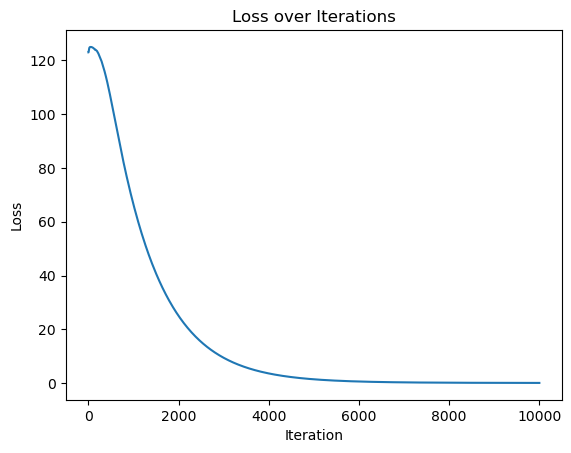

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Plot the loss history
plt.plot(generator.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss_words')
plt.title('Loss over Iterations')
plt.show()


In [6]:
from train import RNNGenerator

# Define the path to the text file
text_file = 'ai_faq_sample.txt'

# Initialize the generator
generator = RNNGenerator(text_file, mode='chars', hidden_size=100, seq_length=25, learning_rate=1e-1)

# Train the model
iterations = 10000
for i in range(iterations):
    generator.step()
    if i % 100 == 0:
        print(f'Iteration: {i}, Loss: {generator.smooth_loss}')
    
generator.save_model('./chars_model.pkl')

Iteration: 0, Loss: 95.71603341070097
Iteration: 100, Loss: 96.2842503444662
Iteration: 200, Loss: 94.8778563452267
Iteration: 300, Loss: 93.15728641661836
Iteration: 400, Loss: 91.14757399777032
Iteration: 500, Loss: 88.92616355206418
Iteration: 600, Loss: 86.60305712000135
Iteration: 700, Loss: 84.20153680142113
Iteration: 800, Loss: 81.7790588503214
Iteration: 900, Loss: 79.35445486519043
Iteration: 1000, Loss: 77.02796800034197
Iteration: 1100, Loss: 74.7327009029062
Iteration: 1200, Loss: 72.48989911037016
Iteration: 1300, Loss: 70.22441538138052
Iteration: 1400, Loss: 68.14062476377171
Iteration: 1500, Loss: 66.06625066990567
Iteration: 1600, Loss: 64.09046472159383
Iteration: 1700, Loss: 62.15922255370852
Iteration: 1800, Loss: 60.29435717993681
Iteration: 1900, Loss: 58.51590647291516
Iteration: 2000, Loss: 56.90119016956397
Iteration: 2100, Loss: 55.22512173142772
Iteration: 2200, Loss: 53.682246121641036
Iteration: 2300, Loss: 52.17688378796597
Iteration: 2400, Loss: 50.70324

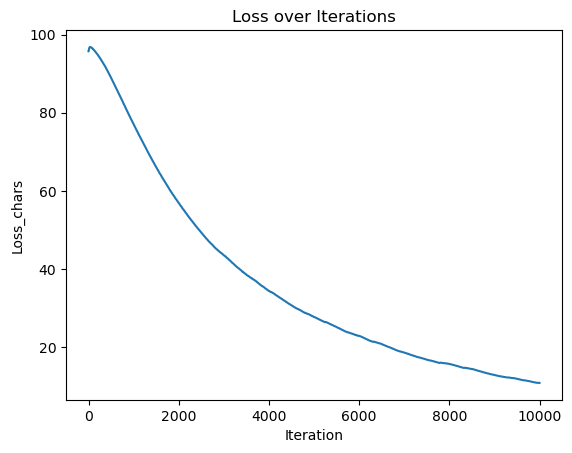

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Plot the loss history
plt.plot(generator.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss_chars')
plt.title('Loss over Iterations')
plt.show()


## Going further experiments

Note, that you can run the code on the command line, as well. You can try this, if you want to run multiple experiments in parallel, or if you want to continue while having a model train in the background.

For now, try to experiment with the various parameters of the model. You can change from word-level to character-level prediction and vice versa. You can also play with the hyperparameters set above. Finally, you can let the model train for longer, or less long. Try to get a feeling, which settings give you the best results. Document your results here:

In [1]:
mode = "words" # chars or words
hidden_size = 100 # Number of neurons in the hidden layer
seq_length = 25 words and 25 chars # Number of tokens to compute in each step
learning_rate = 1e-1 # Learning rate

iterations = 15000 # Number of iterations you let the model train
final_loss =  0.0272193 # What is the final loss you observed?
example_output = "is learn from data without being explicitly programmed. It focuses on the development of computer programs that can access data and use it to learn for themselves. How does Deep Learning differ from Machine Learning?Deep Learning is a subset of Machine Learning that deals with algorithms inspired by the structure and function of the brain's neural networks. It involves learning from large amounts of data, often unstructured or unlabeled. What are some real-world applications of AI?AI is used in various fields, including healthcare (diagnosis and treatment recommendations), finance (fraud processes by machines, especially computer systems. These processes include learning, reasoning," # Give an example output from the final trained model

## Comparison with the Markov model

Finally, we want to compare the output with the Markov model we discussed previously. With both models operating on the same text, which one of them gives better results? Using the parameter set you documented above, generate five different sample outputs. Do the same for the Markov model. What are the best outputs, and what are the worst? Document here:

In [2]:
# Query: 'what is AI'
rnn_best = "is learn from data without being explicitly programmed. It focuses on the development of computer programs that can access data and use it to learn for themselves. How does Deep Learning differ from Machine Learning?Deep Learning is a subset of Machine Learning that deals with algorithms inspired by the structure and function of the brain's neural networks. It involves learning from large amounts of data, often unstructured or unlabeled. What are some real-world applications of AI?AI is used in various fields, including healthcare (diagnosis and treatment recommendations), finance (fraud processes by machines, especially computer systems. These processes include learning, reasoning,"
rnn_worst = "what is AI systictelliantines of AI?AI ables of AI?AI is used in AI (ican rachut ure ing), fira d Ay anc arad catunearnizais ac bysticgtront arw for arfontngely or unlvhrin various fields, includingd uns orizedus AI (Weak AI) and General AI (Strong AI). Narrow AI is designed for a pesiense (xpalthes egune ditainenstoutertore lfrectuog verrima drain focat ed.What orreforged AI recommendation systems lios of AI?AI can bk ta hancano tforing), rets malaka dearningetom encetred ammencitred by Netfli"
markov_best = "that deals with algorithms inspired by the development of the development of computer systems. These processes by the types of the types of Narrow AI?Examples of AI that can be categorized into two types: Narrow AI refers to learn from large amounts of Narrow AI aims to learn for themselves. How does Deep Learning that can be categorized into two types: Narrow AI (Strong AI). Narrow AI?Examples of human can be categorized into two types: Narrow AI refers to learn for a subset of Machine Learning differ from Machine Learning?Deep Learning that a human intelligence processes by Netflix and function"
markov_worst = "include virtual personal assistants like those used by machines, especially computer systems. These processes by the types of the types of computer programs that a subset of Machine Learning?Deep Learning that can be categorized into two types: Narrow AI is a subset of AI?AI can do. What are some examples of AI (Weak AI) and algorithmic trading), retail (personalized shopping experiences), and autonomous vehicles. What are some examples of human can access data and function of Narrow AI?Examples of data, often unstructured or unlabeled. What are some real-world applications of Machine Learning is used by machines, especially computer systems. These"

### Analysis of RNN and Markov Model Responses

#### RNN Model Responses

**Best RNN Response:**
```
"is learn from data without being explicitly programmed. It focuses on the development of computer programs that can access data and use it to learn for themselves. How does Deep Learning differ from Machine Learning?Deep Learning is a subset of Machine Learning that deals with algorithms inspired by the structure and function of the brain's neural networks. It involves learning from large amounts of data, often unstructured or unlabeled. What are some real-world applications of AI?AI is used in various fields, including healthcare (diagnosis and treatment recommendations), finance (fraud processes by machines, especially computer systems. These processes include learning, reasoning,"
```
**Worst RNN Response:**
```
"what is AI systictelliantines of AI?AI ables of AI?AI is used in AI (ican rachut ure ing), fira d Ay anc arad catunearnizais ac bysticgtront arw for arfontngely or unlvhrin various fields, includingd uns orizedus AI (Weak AI) and General AI (Strong AI). Narrow AI is designed for a pesiense (xpalthes egune ditainenstoutertore lfrectuog verrima drain focat ed.What orreforged AI recommendation systems lios of AI?AI can bk ta hancano tforing), rets malaka dearningetom encetred ammencitred by Netfli"
```

#### Markov Model Responses

**Best Markov Response:**
```
"that deals with algorithms inspired by the development of the development of computer systems. These processes by the types of the types of Narrow AI?Examples of AI that can be categorized into two types: Narrow AI refers to learn from large amounts of Narrow AI aims to learn for themselves. How does Deep Learning that can be categorized into two types: Narrow AI (Strong AI). Narrow AI?Examples of human can be categorized into two types: Narrow AI refers to learn for a subset of Machine Learning differ from Machine Learning?Deep Learning that a human intelligence processes by Netflix and function"
```
**Worst Markov Response:**
```
"include virtual personal assistants like those used by machines, especially computer systems. These processes by the types of the types of computer programs that a subset of Machine Learning?Deep Learning that can be categorized into two types: Narrow AI is a subset of AI?AI can do. What are some examples of AI (Weak AI) and algorithmic trading), retail (personalized shopping experiences), and autonomous vehicles. What are some examples of human can access data and function of Narrow AI?Examples of data, often unstructured or unlabeled. What are some real-world applications of Machine Learning is used by machines, especially computer systems. These"
```

### Evaluation Criteria

1. **Coherence**: How well does the response flow logically?
2. **Relevance**: How well does the response address the question "What is AI?"
3. **Accuracy**: Does the response provide correct and precise information based on the training data?

### Detailed Evaluation

#### RNN Best Response Analysis
- **Coherence**: The response is fairly coherent but seems to drift into other topics.
- **Relevance**: It starts relevantly by discussing learning from data, which is part of AI, but quickly transitions to machine learning and deep learning specifics.
- **Accuracy**: It contains accurate information about machine learning and deep learning but lacks a clear and concise definition of AI.

#### RNN Worst Response Analysis
- **Coherence**: The response is incoherent, with many nonsensical phrases and words.
- **Relevance**: It fails to stay on topic.
- **Accuracy**: The response is not accurate or meaningful.

#### Markov Best Response Analysis
- **Coherence**: The response is somewhat repetitive and disjointed.
- **Relevance**: It mentions various types of AI and related concepts but in a disorganized manner.
- **Accuracy**: It has some accurate phrases but lacks clarity and a direct definition of AI.

#### Markov Worst Response Analysis
- **Coherence**: The response is incoherent with many phrases repeating awkwardly.
- **Relevance**: It fails to provide relevant information directly addressing the question.
- **Accuracy**: The response is not accurate or meaningful.

### Conclusion

Comparing the best responses from both models:
- The RNN model, despite drifting topics, provides a more coherent and somewhat relevant response.
- The Markov model's best response is less coherent and more repetitive, though it touches on relevant points.

## Next steps

The RNN presented here is really basic. What options are there to improve...
* ... performance in terms of training time?
* ... quality of predictions?

### Improving Training Time:

1. **Optimized Libraries and Hardware**:
   - Use TensorFlow or PyTorch.
   - Leverage GPUs or TPUs.

2. **Advanced Optimizers and Gradient Clipping**:
   - Implement gradient clipping.
   - Use optimizers like Adam or RMSprop.

3. **Batch Training**:
   - Accumulate gradients over batches for stable training.

4. **Efficient Data Preprocessing**:
   - Optimize sequence length.
   - Ensure efficient data preprocessing and augmentation.

### Improving Quality of Predictions:

1. **Enhanced Model Architectures**:
   - Use LSTM or GRU instead of vanilla RNNs.
   - Consider bidirectional RNNs.

2. **Hyperparameter Tuning**:
   - Tune parameters like learning rate, hidden layer size, and batch size.
   - Use regularization techniques like dropout.

3. **Embedding Layers**:
   - Integrate pre-trained embeddings like Word2Vec or GloVe.
   - Fine-tune embeddings on your dataset.

4. **Training with More Data**:
   - Gather and use more training data.
   - Apply data augmentation techniques.